In [1]:
data <- read.csv("new_chr7_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
151760,chr7_3475700,3475600,3,169,194,80.861244,76.078431
69289,chr7_3475700,3475600,2,35,53,16.746412,20.784314
1,chr7_3475700,3475600,1,5,8,2.392345,3.137255
151761,chr7_3478400,3478300,3,224,254,79.151944,73.410405
69290,chr7_3478400,3478300,2,53,75,18.727915,21.676300
2,chr7_3478400,3478300,1,6,17,2.120141,4.913295
151762,chr7_3478500,3478400,3,75,85,50.335571,40.284360
69291,chr7_3478500,3478400,2,60,86,40.268456,40.758294
3,chr7_3478500,3478400,1,14,40,9.395973,18.957346
151763,chr7_3478800,3478700,3,238,286,84.397163,81.948424


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "bRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "bRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "bRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
46413,chr7_3475700,3475600,194,53,8
46440,chr7_3478400,3478300,254,75,17
46442,chr7_3478500,3478400,85,86,40
46446,chr7_3478800,3478700,286,58,5
46461,chr7_3480400,3480300,276,19,9
46463,chr7_3480900,3480800,82,27,0
46468,chr7_3481200,3481100,128,0,0
46490,chr7_3484500,3484400,183,23,12
46493,chr7_3484600,3484500,190,5,0
46494,chr7_3484900,3484800,296,39,11


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 88512"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
46413,chr7_3475700,3475600,194,53,8,0
46440,chr7_3478400,3478300,254,75,17,2700
46442,chr7_3478500,3478400,85,86,40,100
46446,chr7_3478800,3478700,286,58,5,300
46461,chr7_3480400,3480300,276,19,9,1600
46463,chr7_3480900,3480800,82,27,0,500
46468,chr7_3481200,3481100,128,0,0,300
46490,chr7_3484500,3484400,183,23,12,3300
46493,chr7_3484600,3484500,190,5,0,100
46494,chr7_3484900,3484800,296,39,11,300


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
46413,chr7_3475700,3475600,194,53,8,0
46442,chr7_3478500,3478400,85,86,40,100
46493,chr7_3484600,3484500,190,5,0,100
46736,chr7_3510700,3510600,288,46,15,100
47287,chr7_3566900,3566800,74,39,3,100
47309,chr7_3568800,3568700,326,39,8,100


,binID,start,high,medium,low,dist
46442,chr7_3478500,3478400,85,86,40,100
46493,chr7_3484600,3484500,190,5,0,100
46736,chr7_3510700,3510600,288,46,15,100
47287,chr7_3566900,3566800,74,39,3,100
47309,chr7_3568800,3568700,326,39,8,100
48021,chr7_3638800,3638700,214,4,0,100


[1] 12423

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3478300   3478400   3484400   3484500   3510500   3510600   3566700
    [8]   3566800   3568600   3568700   3638600   3638700   3639500   3639600
   [15]   3641600   3641700   3656800   3656900   3658600   3658700   3665600
   [22]   3665700   3677200   3677300   3687700   3687800   3694000   3694100
   [29]   3694200   3700700   3700800   3704000   3704100   3704200   3705700
   [36]   3705800   3705900   3798400   3798500   3913900   3914000   3924500
   [43]   3924600   3927800   3927900   3973400   3973500   3993500   3993600
   [50]   4003700   4003800   4057900   4058000   4058100   4058300   4058400
   [57]   4059300   4059400   4060900   4061000   4061500   4061600   4061700
   [64]   4061800   4122500   4122600   4126100   4126200   4126300   4131900
   [71]   4132000   4132200   4132300   4135900   4136000   4142100   4142200
   [78]   4149000   4149100   4151000   4151100   4200300   4200400   4253300
   [85]   4253400   4275200   4275300   4276900   4277000   4289700   4289800
   [92]   4304300   4304400   4304500   4304800   4304900   4305600   4305700
   [99]   4306100   4306200   4313500   4313600   4365700   4365800   4379300
  [106]   4379400   4387100   4387200   4412300   4412400   4412500   4412600
  [113]   4412700   4413000   4413100   4429500   4429600   4440800   4440900
  [120]   4488700   4488800   4489700   4489800   4489900   4493200   4493300
  [127]   4493400   4511300   4511400   4513000   4513100   4524700   4524800
  [134]   4546100   4546200   4549600   4549700   4550700   4550800   4568100
  [141]   4568200   4582000   4582100   4583200   4583300   4588900   4589000
  [148]   4589100   4591100   4591200   4592200   4592300   4594700   4594800
  [155]   4614100   4614200   4615500   4615600   4639100   4639200   4669900
  [162]   4670000   4686600   4686700   4691100   4691200   4691500   4691600
  [169]   4703700   4703800   4704000   4704100   4714200   4714300   4717900
  [176]   4718000   4718400   4718500   4723500   4723600   4727000   4727100
  [183]   4740600   4740700   4745800   4745900   4746100   4746200   4748900
  [190]   4749000   4770300   4770400   4775300   4775400   4789600   4789700
  [197]   4789800   4789900   4801500   4801600   4812900   4813000   4814100
  [204]   4814200   4831500   4831600   4848300   4848400   4856500   4856600
  [211]   4875800   4875900   4895300   4895400   4902600   4902700   4903900
  [218]   4904000   4909700   4909800   4910300   4910400   4919600   4919700
  [225]   4919800   4919900   4920200   4920300   4921700   4921800   4923000
  [232]   4923100   4923200   4933300   4933400   4936900   4937000   4944100
  [239]   4944200   4945100   4945200   4945600   4945700   4958900   4959000
  [246]   4961000   4961100   4961700   4961800   5013900   5014000   5014600
  [253]   5014700   5019700   5019800   5029600   5029700   5031100   5031200
  [260]   5031300   5031400   5036800   5036900   5037000   5037500   5037600
  [267]   5038800   5038900   5052200   5052300   5053800   5053900   5062000
  [274]   5062100   5069800   5069900   5075100   5075200   5080700   5080800
  [281]   5095800   5095900   5096000   5105400   5105500   5105600   5128700
  [288]   5128800   5128900   5129300   5129400   5136100   5136200   5159900
  [295]   5160000   5174400   5174500   5181100   5181200   5202600   5202700
  [302]   5202800   5202900   5239600   5239700   5256100   5256200   5275800
  [309]   5275900   5276000   5276200   5276300   5290800   5290900   5292000
  [316]   5292100   5363900   5364000   5368500   5368600   5372800   5372900
  [323]   5414800   5414900   5424400   5424500   5443100   5443200   5443300
  [330]   5457900   5458000   5522500   5522600   5545800   5545900   5559800
  [337]   5559900   5565800   5565900   5574200   5574300   5574400   5592600
  [344]   5592700   5593100   5593200   5594400   5594500   5594600   5599600
  [351]   5599700   5616000   5616100   5616200   5621100   5621200   5621400
  [358]   5621500   564970

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
46440,chr7_3478400,3478300,254,75,17
46442,chr7_3478500,3478400,85,86,40
46490,chr7_3484500,3484400,183,23,12
46493,chr7_3484600,3484500,190,5,0
46734,chr7_3510600,3510500,213,66,13
46736,chr7_3510700,3510600,288,46,15
47285,chr7_3566800,3566700,47,48,11
47287,chr7_3566900,3566800,74,39,3
47308,chr7_3568700,3568600,209,83,12
47309,chr7_3568800,3568700,326,39,8


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
46442,chr7_3478500,3478400,6.27260687196263e-15
46490,chr7_3484500,3484400,0
46493,chr7_3484600,3484500,1.30615237727036e-05
46734,chr7_3510600,3510500,0
46736,chr7_3510700,3510600,0.00690202323640762
47285,chr7_3566800,3566700,0


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
48021,chr7_3638800,3638700,0.163733134163181
48033,chr7_3639700,3639600,0.489330383137174
48051,chr7_3641800,3641700,0.0850624566995012
48193,chr7_3657000,3656900,0.291940477611926
48207,chr7_3658800,3658700,0.100178294226269
48257,chr7_3665800,3665700,0.80961774414258


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3638600   3638700   3639500   3639600   3641600   3641700   3656800
   [8]   3656900   3658600   3658700   3665600   3665700   3704000   3704100
  [15]   3798400   3798500   3927800   3927900   4057900   4058000   4058100
  [22]   4061600   4061700   4122500   4122600   4132200   4132300   4275200
  [29]   4275300   4304300   4304400   4304500   4304800   4304900   4305600
  [36]   4305700   4313500   4313600   4387100   4387200   4511300   4511400
  [43]   4513000   4513100   4588900   4589000   4589100   4745800   4745900
  [50]   4814100   4814200   4848300   4848400   4919800   4919900   4920200
  [57]   4920300   4923100   4923200   5029600   5029700   5031100   5031200
  [64]   5031300   5036800   5036900   5075100   5075200   5080700   5080800
  [71]   5128700   5128800   5174400   5174500   5202600   5202700   5202800
  [78]   5202900   5275900   5276000   5290800   5290900   5443200   5443300
  [85]   5522500   5522600   5592600   5592700   5594500   5594600   5616000
  [92]   5616100   5616200   5621100   5621200   5836400   5836500   5853700
  [99]   5853800   5859800   5859900   5860400   5860500   5899600   5899700
 [106]   5904900   5905000   5990400   5990500   6010500   6010600   6019300
 [113]   6019400   6070400   6070500   6074300   6074400   6074500   6074700
 [120]   6074800   6142000   6142100   6142200   6171500   6171600   6204100
 [127]   6204200   6250600   6250700   6300800   6300900   6301000   6362800
 [134]   6362900   6394000   6394100   6415200   6415300   6415400   6440500
 [141]   6440600   6501400   6501500   6607600   6607700   6611400   6611500
 [148]   6617800   6617900   6621200   6621300   6621900   6622000   6914100
 [155]   6914200   6928100   6928200   7010800   7010900   7019000   7019100
 [162]   7019200   7020000   7020100   7020200   7020300   7020400   7021600
 [169]   7021700   7045600   7045700   7047800   7047900   7067300   7067400
 [176]   7068500   7068600   7069900   7070000   7070700   7070800   7072500
 [183]   7072600   7072700   7072800   7080900   7081000   7081500   7081600
 [190]   7086700   7086800   7086900   7087000   7121500   7121600   7127800
 [197]   7127900   7163900   7164000   7165200   7165300   7254100   7254200
 [204]   7272200   7272300   7291500   7291600   7291700   7291800   7302600
 [211]   7302700   7341300   7341400   7353900   7354000   7375400   7375500
 [218]   7408700   7408800   7409800   7409900   7453400   7453500   7453600
 [225]   7490800   7490900   7614700   7614800   7622500   7622600   7636600
 [232]   7636700   7735300   7735400   7796500   7796600   7811800   7811900
 [239]   7920600   7920700   7920800   7989200   7989300   8065500   8065600
 [246]   8174100   8174200   8271800   8271900   8274100   8274200   8341300
 [253]   8341400   8341700   8341800   8384800   8384900   8385000   8393000
 [260]   8393100   8435100   8435200   8446600   8446700   8456900   8457000
 [267]   8540900   8541000   8541100   8541200   8542800   8542900   8561200
 [274]   8561300   8565800   8565900   8579500   8579600   8720700   8720800
 [281]   8778400   8778500   8793300   8793400   9041900   9042000   9052200
 [288]   9052300   9058600   9058700   9059400   9059500   9109600   9109700
 [295]   9156600   9156700   9157300   9157400   9196400   9196500   9334000
 [302]   9334100   9340900   9341000   9341500   9341600   9342200   9342300
 [309]   9957900   9958000   9996300   9996400   9996500  10010200  10010300
 [316]  10016200  10016300  10050900  10051000  10064400  10064500  10082800
 [323]  10082900  10121100  10121200  10201000  10201100  10254300  10254400
 [330]  10315000  10315100  10323400  10323500  10325400  10325500  10406400
 [337]  10406500  10656600  10656700  10685600  10685700  10745400  10745500
 [344]  10776200  10776300  10789700  10789800  10794100  10794200  10794900
 [351]  10795000  10836000  10836100  10837700  10837800  10859900  10860000
 [358]  10877600  10877700  10891200  10891300  10897500  10897600  10899500

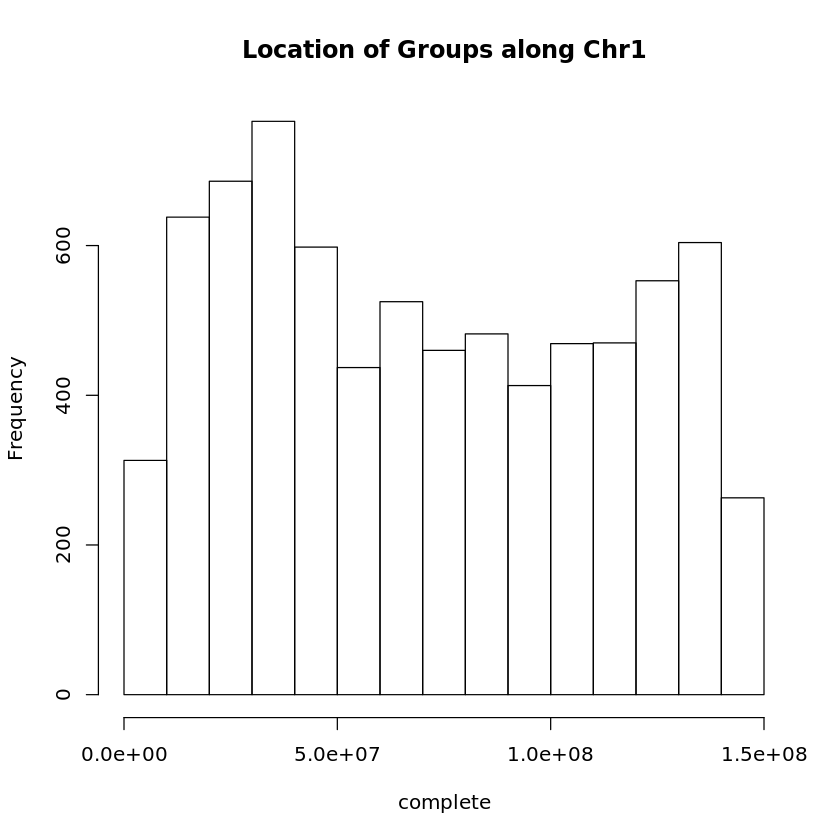

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
48020,chr7_3638700,3638600,194,0,0
48021,chr7_3638800,3638700,214,4,0
48028,chr7_3639600,3639500,386,46,3
48033,chr7_3639700,3639600,356,54,2
48049,chr7_3641700,3641600,163,35,0
48051,chr7_3641800,3641700,115,40,0
48192,chr7_3656900,3656800,135,47,5
48193,chr7_3657000,3656900,67,22,0
48206,chr7_3658700,3658600,64,0,0
48207,chr7_3658800,3658700,84,0,0


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 7677"

In [16]:
library(ggplot2)

In [17]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [18]:
part[20:60,]

,binID,start,high,medium,low
20,chr7_3704200,3704100,0,0,158
110,gap 7,0,100,100,100
22,chr7_3798500,3798400,117,55,14
23,chr7_3798600,3798500,193,93,41
112,gap 8,0,100,100,100
25,chr7_3927900,3927800,44,27,3
26,chr7_3928000,3927900,17,4,0
113,gap 9,0,100,100,100
28,chr7_4058000,4057900,14,0,0
29,chr7_4058100,4058000,19,0,0


In [19]:
head(part)
tail(part)

,binID,start,high,medium,low
48020,chr7_3638700,3638600,194,0,0
2,chr7_3638800,3638700,214,4,0
1,gap 1,0,100,100,100
4,chr7_3639600,3639500,386,46,3
5,chr7_3639700,3639600,356,54,2
11,gap 2,0,100,100,100


,binID,start,high,medium,low
14225,gap 3637,0,100,100,100
113111,chr7_145236100,145236000,217,42,4
113121,chr7_145236200,145236100,200,47,6
14226,gap 3638,0,100,100,100
113141,chr7_145285800,145285700,277,49,4
113151,chr7_145285900,145285800,401,63,11


In [20]:
write.csv(part, "chr7_B_group.csv")

[1] "Total Number of groups: 3639"

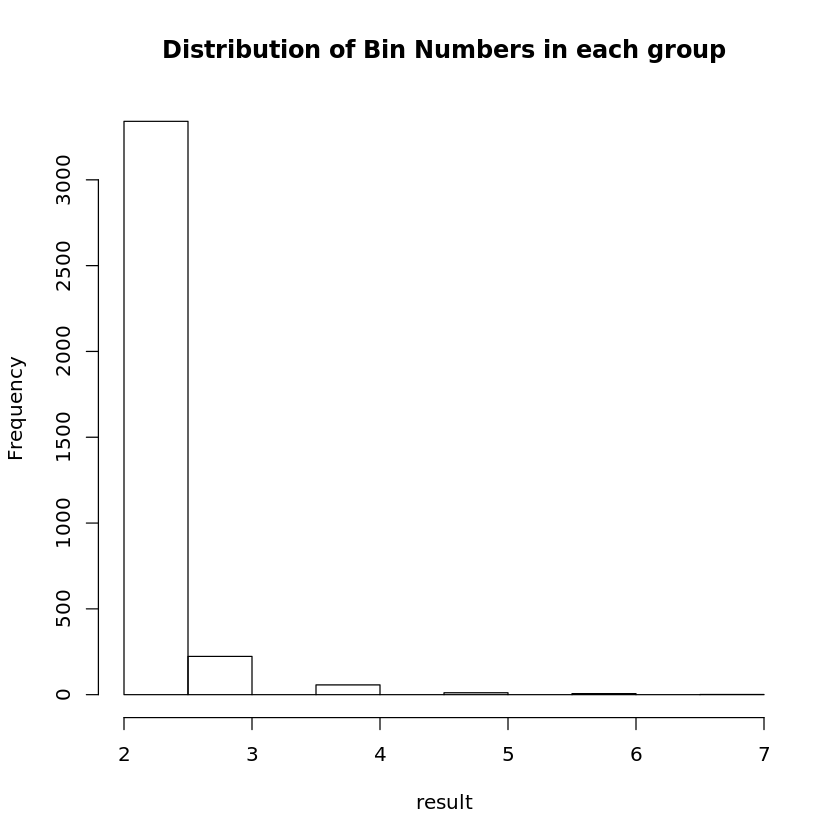

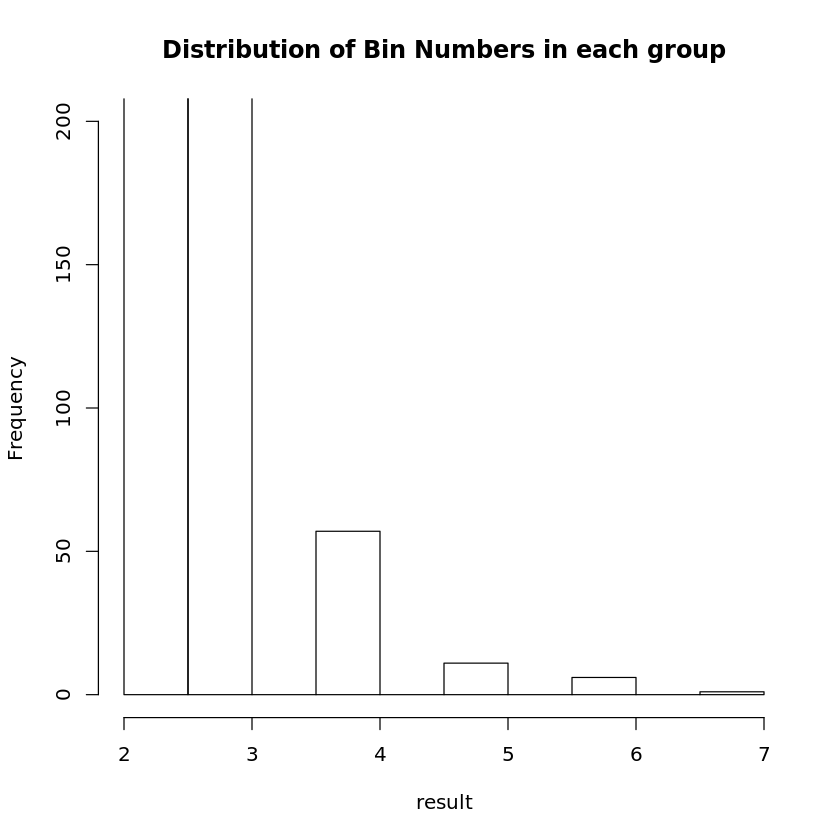

In [21]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [22]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [23]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [24]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [25]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [26]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [27]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [28]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [29]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")